# Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix ,accuracy_score, classification_report
import pandas as pd
from mpl_toolkits import mplot3d

# Dataset filepaths




In [ ]:
class1path = r'/content/drive/MyDrive/Group05/Classification/LS_Group05/Class1.txt'
class2path =  r'/content/drive/MyDrive/Group05/Classification/LS_Group05/Class2.txt'
class3path =  r'/content/drive/MyDrive/Group05/Classification/LS_Group05/Class3.txt'

# Loading Datasets

In [ ]:
def load_data(filepath):    
    data = np.loadtxt(filepath) # Reading data from text file using numpy
    return data

In [ ]:
class1_data = load_data(class1path)
class2_data = load_data(class2path)
class3_data = load_data(class3path)


## Plots of Class data points

In [ ]:
def plot(class1,class2,class3):  
  x1 , y1 = class1[:,0] , class1[:,1]  
  x2 , y2 = class2[:,0] , class2[:,1]
  x3 , y3 = class3[:,0] , class3[:,1]
 
  c1=plt.scatter(x1, y1, color='r',edgecolors='black')
  c2=plt.scatter(x2, y2, color='g',edgecolors='black')
  c3=plt.scatter(x3, y3, color='orange',edgecolors='black')
  plt.title("Linearly Separable Input Data")
  plt.legend((c1,c2,c3),("class1","class2","class3"))
  # plt.savefig("/content/drive/MyDrive/Group05/results/input.png")

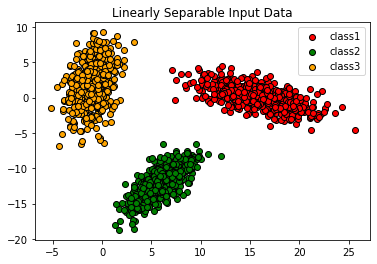

In [ ]:
  plot(class1_data,class2_data,class3_data)

## Train Valid Test Split (60%-20%-20%)

In [ ]:
def train_test_split(data):
  row, col = data.shape
  n = int(0.6*row)
  train = data[:n]
  validation=data[n:int(0.8*row)]
  test = data[int(0.8*row):row]
  return train,validation,test

In [ ]:
class1_train , class1_valid, class1_test  = train_test_split(class1_data)
class2_train , class2_valid, class2_test = train_test_split(class2_data)
class3_train , class3_valid, class3_test = train_test_split(class3_data)

class_train = np.append(class1_train,class2_train,axis=0) #Class 1 and Class 2 Training Data
class_train=np.append(class_train,class3_train,axis=0)

class_test = np.append(class1_test,class2_test,axis=0) #Class 1 and Class 2 Training Data
class_test=np.append(class_test,class3_test,axis=0)



# Activation Function

In [ ]:

def sigmoid_af(x):
    return 1/(1+np.exp(-(x)))


# Training

In [ ]:
def model_train(train_data , nodes,epochs):
  N, d = train_data.shape
  w_h = np.random.randn(3, nodes+1)
  w_o =np.random.randn(nodes+1, 3)

  err = []
  avg_err = []

  while(epochs):    

    for i in range(N):
      
      x=[1,train_data[i,0], train_data[i, 1]]
      
      h=sigmoid_af(np.dot(w_h.T,x)) #activation value      

      y_pred=sigmoid_af(np.dot(w_o.T,h))

      if i<300:
        y_op = np.array([1,0,0])
        en=sum(0.5*(y_op-y_pred)**2)
      elif i<600:
        y_op = np.array([0,1,0])
        en=sum(0.5*(y_op-y_pred)**2)
      else:
        y_op = np.array([0,0,1])
        en=sum(0.5*(y_op-y_pred)**2)

      err.append(en)
      neta = 0.01
            
      #Update weights
      w_o = w_o + (neta * np.outer(h, ((y_op-y_pred) * y_pred * (1-y_pred))))
            
      var1 = np.dot(w_o, ((y_op-y_pred) * y_pred * (1-y_pred)))
      var2 = h * (1-h)
            
      w_h = w_h + (neta * np.outer(x, var1*var2))
      

    error_avg = sum(err)/len(err)
    avg_err.append(error_avg)
    if epochs%10==0:
      print("Error",error_avg)
    epochs = epochs-1

  return w_o,w_h, avg_err,h,y_pred,nodes


In [ ]:
wo, wh, avg_err, h_out, o_out,nodes = model_train(class_train, 4,100) #for 4 nodes and 100 epohcs

Error 0.39768207076548207
Error 0.16928731329355495
Error 0.11288739167242497
Error 0.08578788810113967
Error 0.06966457976943317
Error 0.058862917403527615
Error 0.051075004498697216
Error 0.04517315920592879
Error 0.040536937397611
Error 0.036794803319327524


In [ ]:
wo1, wh1, avg_err1, h_out1, o_out1,node1 = model_train(class_train, 1,100) #for 1 node and 100 epohcs

Error 0.4397997464257473
Error 0.2539590049469422
Error 0.20675190559463702
Error 0.1856775292981555
Error 0.17357270499699134
Error 0.1656742689432153
Error 0.1600979455378058
Error 0.15594019521513394
Error 0.15271373064046018
Error 0.15013262568925004


In [ ]:
wo2, wh2, avg_err2, h_out2, o_out2 ,node2= model_train(class_train, 2,100) #for 2 nodes and 100 epohcs

Error 0.35907021148500756
Error 0.2838260166860232
Error 0.2720213846736655
Error 0.266717560087419
Error 0.2635908969496937
Error 0.26149411255920313
Error 0.2599777998155856
Error 0.25882586882469844
Error 0.25791978583108194
Error 0.25718819571183177


In [ ]:
wo8, wh8, avg_err8, h_out8, o_out8,node8 = model_train(class_train, 8,100) #for 8 nodes and 100 epohcs

Error 0.4294134342427473
Error 0.09458740694322204
Error 0.05751377765530956
Error 0.04220505809158818
Error 0.03363261535353339
Error 0.02810392849239679
Error 0.02421934283529445
Error 0.021327978628978443
Error 0.019085309217966785
Error 0.017291177079628135


# Testing

In [ ]:
def test_model(wh,wo,x):    
    # N, d =x.shape
    y_pred_list = []
    a_list=[]

    for i in range(len(x)):
        y=np.zeros(3)
        xi= [1,x[i,0],x[i,1]]
        h1 = np.dot(wh.T, xi)
        a = sigmoid_af(h1)
        a_list.append(a)
       
        out=np.dot(wo.T,a)
        y_cap=sigmoid_af(out)
        ind=np.argmax(y_cap)
        
        y[ind]=1
        y_pred_list.append(ind)

    return np.array(y_pred_list),np.array(a_list)

In [ ]:
def get_max_min(c1,c2,c3): # function to get min max data_points from dataset
  xmax = int(max([max(c1[0]), max(c2[0]), max(c3[0])]))
  ymax = int(max([max(c1[1]), max(c2[1]), max(c3[1])]))
  xmin = int(min([min(c1[0]), min(c2[0]), min(c3[0])]))
  ymin = int(min([min(c1[1]), min(c2[1]), min(c3[1])]))
  return xmax , ymax , xmin , ymin


In [ ]:
xmax , ymax , xmin , ymin = get_max_min(class1_data,class2_data, class3_data)

points = []
for i in range(xmin-5, xmax+55):
    for j in range(ymin-12, ymax-5):
        points.append([i, j])
points=np.array(points) 
print(points)

[[-20 -23]
 [-20 -22]
 [-20 -21]
 ...
 [ 67   9]
 [ 67  10]
 [ 67  11]]


In [ ]:
output4,a_list4=test_model(wh,wo,points)
output1,a_list1=test_model(wh1,wo1,points)
output2,a_list2=test_model(wh2,wo2,points)
output8,a_list8=test_model(wh8,wo8,points)
# print(output)

# Decision Region Plot

In [ ]:
def plotting(y,nodes):
  c1x, c2x, c3x = [], [], []
  c1y, c2y, c3y = [], [], []

  for i in range(len(points)):
        
    if y[i] == 0:
      c1x.append(points[i,0])
      c1y.append(points[i, 1])
    elif y[i] == 1:
      c2x.append(points[i, 0])
      c2y.append(points[i, 1])
    elif y[i]==2:
      c3x.append(points[i, 0])
      c3y.append(points[i, 1])
    

  plt.scatter(c2x, c2y, marker='*', s=90)
  plt.scatter(c3x, c3y, marker='*', s=90)
  plt.scatter(c1x, c1y, marker='*', s=90)



# plt.legend(['Class 2','Class 3', 'Class 1'])
  plt.legend(['Class 2','Class 3', 'Class 1'], bbox_to_anchor=(1.04,1), loc="upper left")


  plt.scatter(class1_data[:,0], class1_data[:,1],color="r", edgecolors='black')
  plt.scatter(class2_data[:,0], class2_data[:,1],color="g", edgecolors='black')
  plt.scatter(class3_data[:,0], class3_data[:,1],color="orange", edgecolors='black')
  # plt.savefig("/content/drive/MyDrive/Group05/results/fcnndecisionboundary.png")

  plt.title("Decision Boundary for "+str(nodes)+" nodes and a single layer")
  plt.tight_layout()
  plt.xlim(-12, 25)
  plt.ylim(-25, 12)
  plt.show()

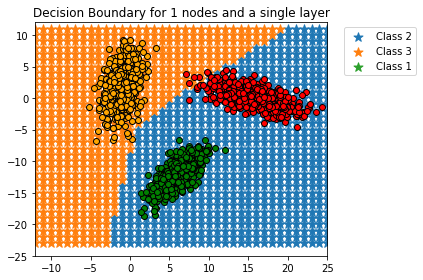

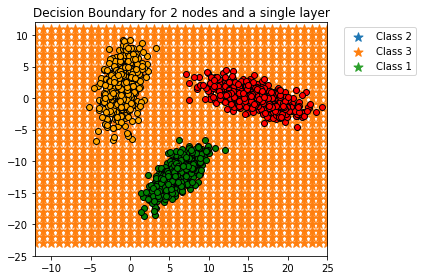

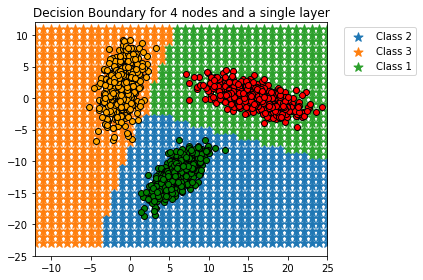

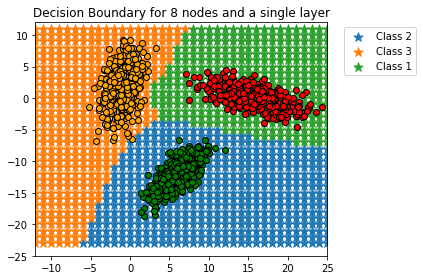

In [ ]:
plot1=plotting(output1,1)
plot2=plotting(output2,2)
plot3=plotting(output4,4)
plot4=plotting(output8,8)

In [ ]:
def errorplot(avg_error,nodes):
  plt.plot(avg_err)
  plt.title("Average Error vs Epoch for "+str(nodes)+" nodes and a single layer")
  plt.xlabel("Epoch")
  plt.ylabel("Average Error")
  plt.show()
# plt.savefig("/content/drive/MyDrive/Group05/results/fcnn_errorvsepoch.png")

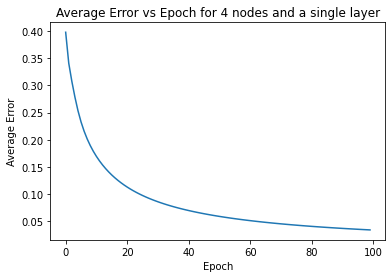

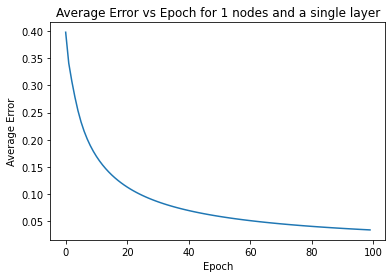

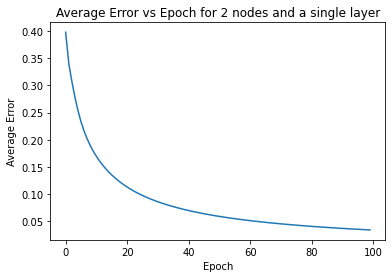

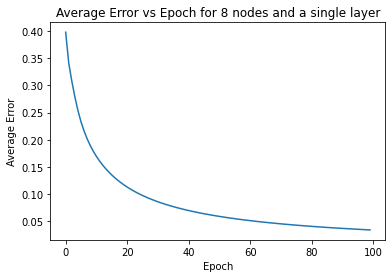

In [ ]:
errorplot(avg_err,4)
errorplot(avg_err1,1)
errorplot(avg_err2,2)
errorplot(avg_err8,8)


# Results observed

In [ ]:
yp4,n4=test_model(wh,wo,class_test)
yp1,n1=test_model(wh1,wo1,class_test)
yp2,n2=test_model(wh2,wo2,class_test)
yp8,n8=test_model(wh8,wo8,class_test)
n4.shape

(300, 5)

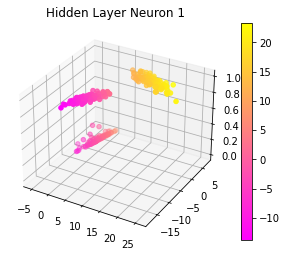

In [ ]:
x,y,z=class_test[:,0],class_test[:,1],n2[:,1]
fig = plt.figure()
ax = plt.axes(projection ="3d")
color_map = plt.get_cmap('spring')
scatter_plot = ax.scatter3D(x, y, z, c=(x+y+z),cmap=color_map)
plt.title("Hidden Layer Neuron 1")
plt.colorbar(scatter_plot)

## Confusion Matrix and Accuracy

In [ ]:
def confusion(test_data,wh,wo):
  y1,y2,y3,=np.empty(100),np.empty(100),np.empty(100)
  y1.fill(0)
  y2.fill(1)
  y3.fill(2)
  y_true=np.append(y1,y2)
  y_true=np.append(y_true,y3)
  y_pred= test_model(wh,wo,test_data)
  print(confusion_matrix(y_true,y_pred))
  return y_true,y_pred


In [ ]:
y_true1,y_pred1=confusion(class_test,wh1,wo1)
y_true,y_pred=confusion(class_test,wh2,wo2)
y_true,y_pred=confusion(class_test,wh,wo)
y_true,y_pred=confusion(class_test,wh8,wo8)

ValueError: ignored

# Accuracy

In [ ]:
print("ACCURACY for 1 node: ",accuracy_score(y_true1, y_pred1))
print("ACCURACY for 4 nodes: ",accuracy_score(y_true, y_pred))

NameError: ignored

# Classification Report

In [ ]:
print(classification_report(y_true1, y_pred1))
print(classification_report(y_true, y_pred))